In [ ]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import json
from PIL import Image


In [ ]:
https://albumentations.ai/docs/examples/example_bboxes/

In [22]:
# Visualize the augmented image with bounding boxes
def plot_boxes(box,img):
    for bo in box:
        x_center, y_center, w, h = bo
        xtl = int((x_center - w / 2) * img.shape[1])
        ytl = int((y_center - h / 2) * img.shape[0])
        xbr = int((x_center + w / 2) * img.shape[1])
        ybr = int((y_center + h / 2) * img.shape[0])
        
    #    # Draw bounding box
    augmented_image = cv2.rectangle(img, (xtl, ytl), (xbr, ybr), (0, 255, 0), 2)

    # Convert to RGB for displaying with plt
    augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)

    # Show the augmented image
    plt.imshow(augmented_image)
    return plt.show()


In [40]:


def aug(image, bboxes, category_ids, output_path_img):
    # Define the augmentation pipeline with bounding boxes
    plot_boxes(bboxes,image)

    transform = A.Compose([
        A.HorizontalFlip(p=1),  # 100% chance of flipping the image
        A.Rotate(limit=40, p=0.5),  # 50% chance of rotating the image by up to 40 degrees
        A.Resize(width=410, height=416),  # Resize the image
        ToTensorV2()  # Convert to Tensor (if using for PyTorch)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

    augmented = transform(image=image, bboxes=bboxes, category_ids=category_ids)

    # Get the augmented image and bounding boxes
    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']

    # Convert the tensor back to NumPy array for OpenCV
    augmented_image = augmented_image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
    augmented_image = (augmented_image * 255).astype('uint8')  # Scale to 0-255 for OpenCV

    image = Image.fromarray(augmented_image.astype('uint8'))
    image.save(output_path_img)

    # Show the augmented image
    
    plot_boxes(augmented_bboxes, augmented_image)
    return (augmented_bboxes,augmented_image, category_ids)



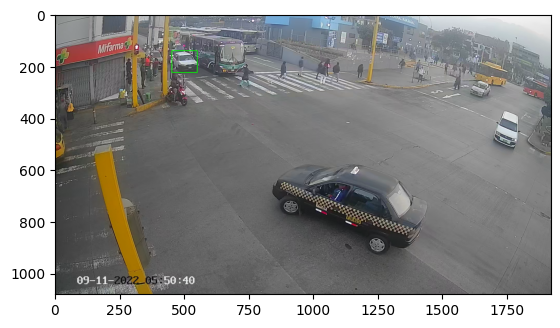

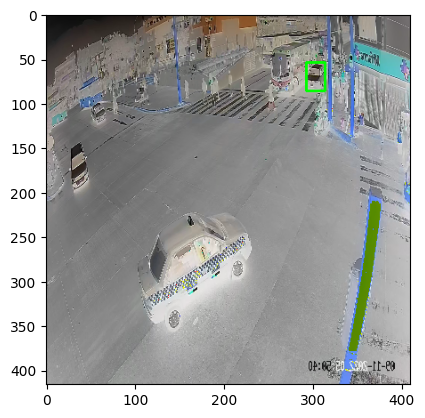

In [41]:
# Example of image and bounding boxes in YOLO format (x_center, y_center, width, height)
image = cv2.imread("../data/dataset/images/video1_frame_1.png")
bboxes = [[0.59471, 0.69869, 0.31857, 0.33333],
        [0.26067, 0.16956, 0.05097, 0.07768]]  # YOLO format: [x_center, y_center, width, height]
category_ids = [0,10]  # Example categories (class labels)
output_path_img = "../data/dataset/ouput.png" #tengo que usar el path dato, tambien especificar de una la salida del tetp


box, img, cate = aug(image, bboxes, category_ids, output_path_img) # falta guardar la imagen, y el text, mas bien agregar al dataset

In [34]:
cate

[0, 10]

In [35]:
box

[[0.40529000759124756,
  0.6986899971961975,
  0.31857001781463623,
  0.33333003520965576],
 [0.739329993724823,
  0.1695600003004074,
  0.05096995830535889,
  0.07767999172210693]]